# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# !pip install citipy
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']

        city_lng = city_weather['coord']['lon']

        city_max_temp = city_weather['main']['temp_max']

        city_humidity = city_weather['main']['humidity']

        city_clouds = city_weather['clouds']['all']

        city_wind = city_weather['wind']['speed']

        city_country = city_weather['sys']['country']

        city_date = city_weather['sys']['sunrise']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tindouf
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | trondheim
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | weno
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | egremont
Processing Record 15 of Set 1 | tyukhtet
Processing Record 16 of Set 1 | saratamata
City not found. Skipping...
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | tulagi
Processing Record 21 of Set 1 | lebu
Processing Re

Processing Record 36 of Set 4 | gorontalo
Processing Record 37 of Set 4 | iwanai
Processing Record 38 of Set 4 | manggar
Processing Record 39 of Set 4 | kismayo
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | bonthe
Processing Record 42 of Set 4 | fort st. john
Processing Record 43 of Set 4 | fale old settlement
Processing Record 44 of Set 4 | ebaye
Processing Record 45 of Set 4 | badger
Processing Record 46 of Set 4 | jonesboro
Processing Record 47 of Set 4 | farkhar
Processing Record 48 of Set 4 | banda aceh
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | zhanaozen
Processing Record 1 of Set 5 | ghormach
Processing Record 2 of Set 5 | zyryanskoye
Processing Record 3 of Set 5 | revda
Processing Record 4 of Set 5 | tralee
Processing Record 5 of Set 5 | anloga
Processing Record 6 of Set 5 | semporna
Processing Record 7 of Set 5 | usinsk
Processing Record 8 of Set 5 | pimentel
Processing Record 9 of Set 5 | namibe
Processing Record 10 o

Processing Record 28 of Set 8 | oyon
Processing Record 29 of Set 8 | urzhar
Processing Record 30 of Set 8 | mandalgovi
Processing Record 31 of Set 8 | madimba
Processing Record 32 of Set 8 | chipping ongar
Processing Record 33 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 34 of Set 8 | susuman
Processing Record 35 of Set 8 | ranchettes
Processing Record 36 of Set 8 | tosontsengel
Processing Record 37 of Set 8 | awjilah
Processing Record 38 of Set 8 | mazabuka
Processing Record 39 of Set 8 | nakatsugawa
Processing Record 40 of Set 8 | magdalena de kino
Processing Record 41 of Set 8 | kolokani
Processing Record 42 of Set 8 | pitimbu
Processing Record 43 of Set 8 | angaur state
Processing Record 44 of Set 8 | fiambala
Processing Record 45 of Set 8 | brooks
Processing Record 46 of Set 8 | laascaanood
Processing Record 47 of Set 8 | crane
Processing Record 48 of Set 8 | bayanaul
Processing Record 49 of Set 8 | alotau
City not found. Skipping...
Processing Record 0 of Set 

Processing Record 20 of Set 12 | taroa
Processing Record 21 of Set 12 | chishmy
Processing Record 22 of Set 12 | nemuro
Processing Record 23 of Set 12 | luga
Processing Record 24 of Set 12 | glenvale
Processing Record 25 of Set 12 | gisborne
Processing Record 26 of Set 12 | loa janan
Processing Record 27 of Set 12 | pyt-yakh
Processing Record 28 of Set 12 | peniche
Processing Record 29 of Set 12 | khenifra
Processing Record 30 of Set 12 | carutapera
Processing Record 31 of Set 12 | smithers
Processing Record 32 of Set 12 | antsiranana
Processing Record 33 of Set 12 | chauk
Processing Record 34 of Set 12 | magsaysay
Processing Record 35 of Set 12 | chonchi
Processing Record 36 of Set 12 | cidreira
Processing Record 37 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 38 of Set 12 | pacocha
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
print(len(city_data))

564


In [6]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tindouf,27.6711,-8.1474,19.40,47,18,5.02,DZ,1699166752
1,whitehorse,60.7161,-135.0538,-1.06,81,75,4.63,CA,1699202160
2,trondheim,63.4305,10.3951,5.05,89,100,2.40,NO,1699168097
3,enewetak,11.3474,162.3373,28.49,72,95,7.87,MH,1699211021
4,weno,7.4515,151.8468,28.85,76,98,5.50,FM,1699213271


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tindouf,27.6711,-8.1474,19.40,47,18,5.02,DZ,1699166752
1,whitehorse,60.7161,-135.0538,-1.06,81,75,4.63,CA,1699202160
2,trondheim,63.4305,10.3951,5.05,89,100,2.40,NO,1699168097
3,enewetak,11.3474,162.3373,28.49,72,95,7.87,MH,1699211021
4,weno,7.4515,151.8468,28.85,76,98,5.50,FM,1699213271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

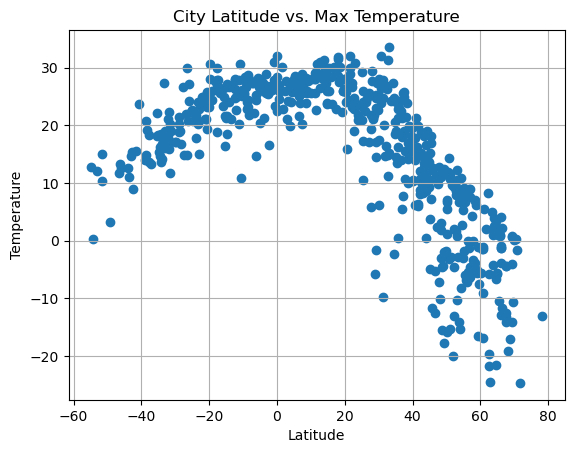

<Figure size 640x480 with 0 Axes>

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

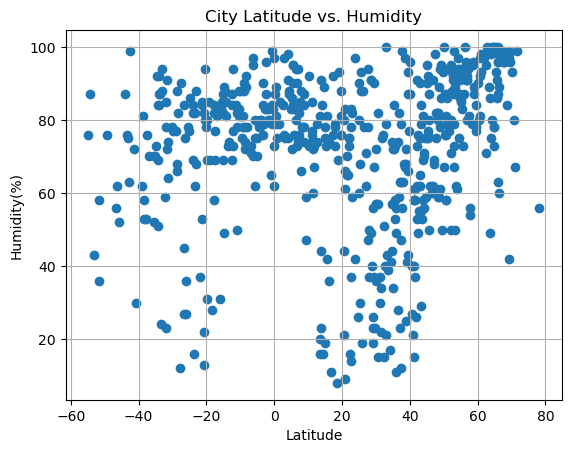

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

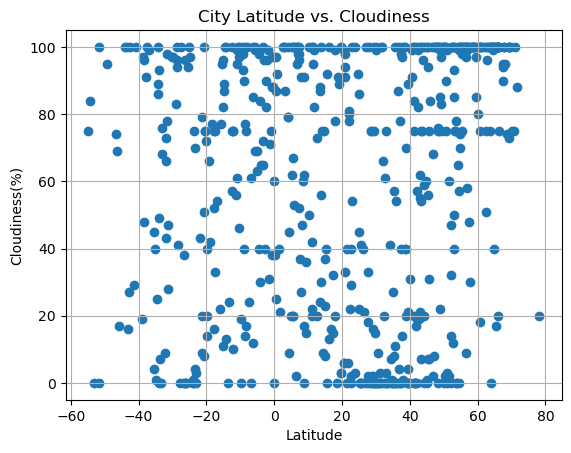

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

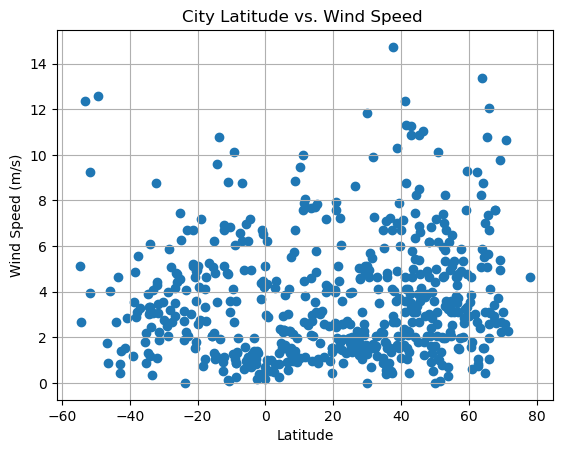

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
plt.title("City Latitude vs. Wind Speed ")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_reg(x,y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,0.8),fontsize=15,color="red")

    plt.xlabel('X')
    plt.ylabel('y')

    print(f"The r-value is: {rvalue}", line_eq)
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[ (city_data_df['Lat'] >=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tindouf,27.6711,-8.1474,19.40,47,18,5.02,DZ,1699166752
1,whitehorse,60.7161,-135.0538,-1.06,81,75,4.63,CA,1699202160
2,trondheim,63.4305,10.3951,5.05,89,100,2.40,NO,1699168097
3,enewetak,11.3474,162.3373,28.49,72,95,7.87,MH,1699211021
4,weno,7.4515,151.8468,28.85,76,98,5.50,FM,1699213271


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[ (city_data_df['Lat'] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,adamstown,-25.0660,-130.1015,22.74,77,100,7.43,PN,1699192196
6,port-aux-francais,-49.3500,70.2167,3.16,76,95,12.58,TF,1699227599
7,waitangi,-43.9535,-176.5597,12.68,87,100,2.68,NZ,1699287632
8,san antonio de pale,-1.4014,5.6325,26.15,83,31,4.37,GQ,1699161361
9,grytviken,-54.2811,-36.5092,0.32,87,84,2.67,GS,1699165901


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.827852891453468 y = -0.59x + 34.65


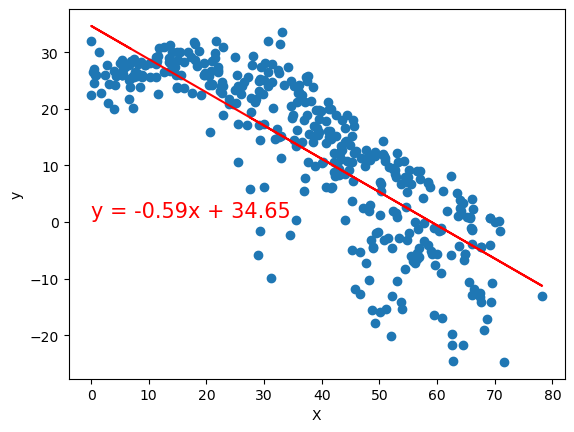

In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])


The r-value is: 0.7518769070582715 y = 0.31x + 28.19


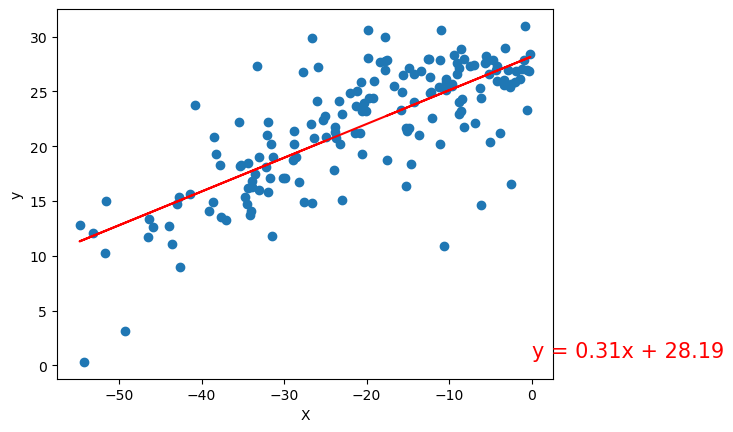

In [29]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22647131506627638 y = 0.26x + 61.84


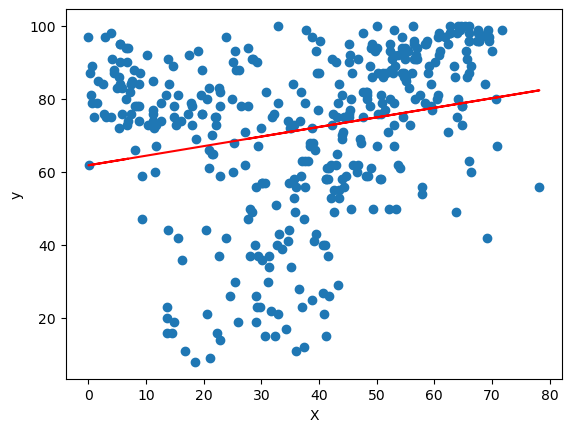

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r-value is: 0.28187697205840817 y = 0.37x + 80.4


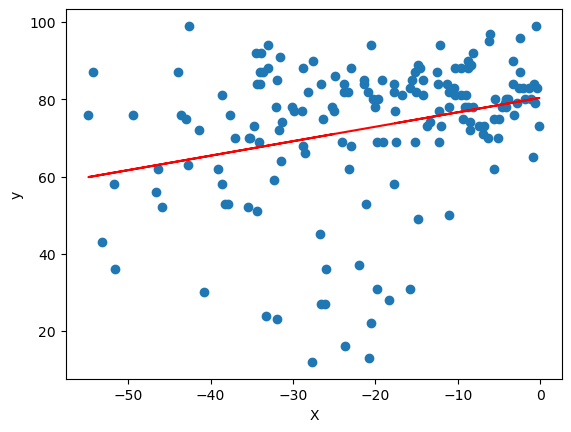

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2295891201492056 y = 0.47x + 40.54


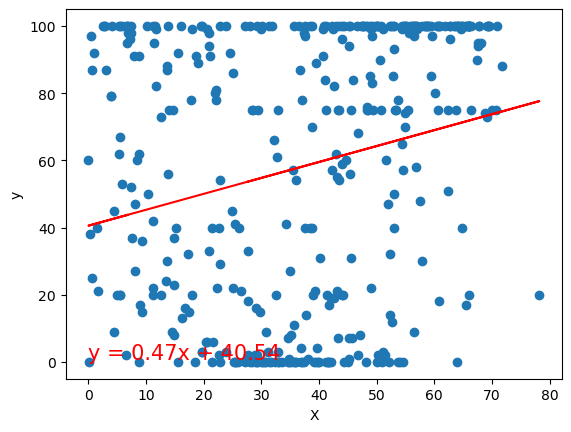

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

The r-value is: 0.12156233750403361 y = 0.32x + 66.65


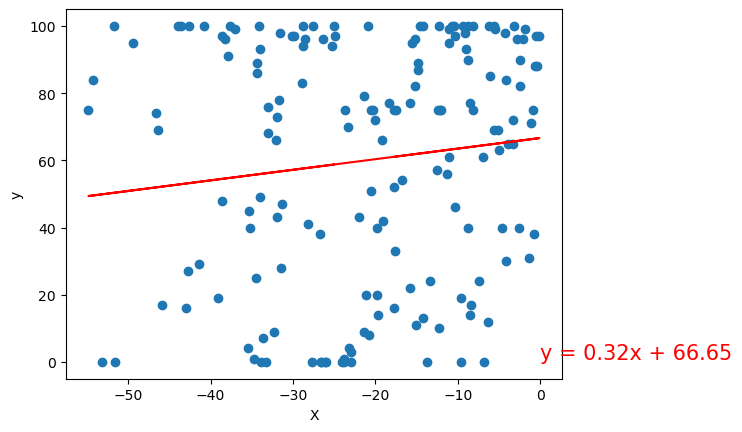

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1940039402188708 y = 0.03x + 2.73


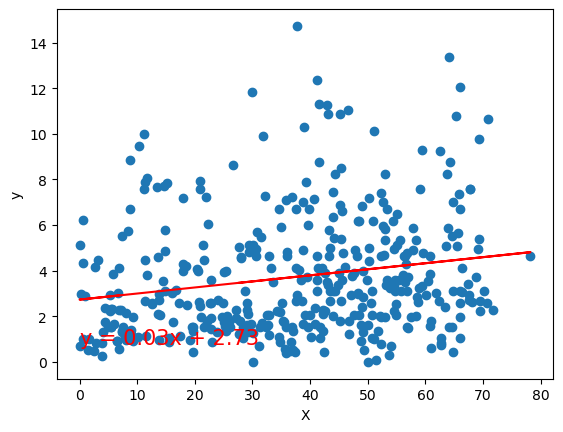

In [34]:
# Northern Hemisphere
# YOUR CODE HERE
linear_reg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

The r-value is: -0.11596958749574905 y = -0.02x + 3.06


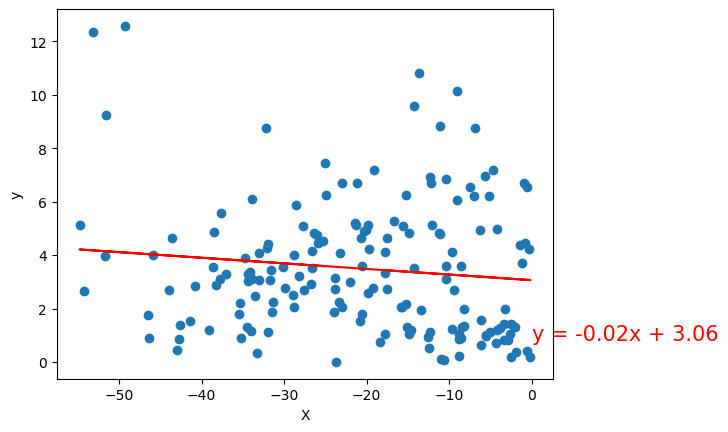

In [35]:
# Southern Hemisphere
# YOUR CODE HERE
linear_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE